In [1]:
from imu_calibration import calibrator,dataCollector
from ellipsoid_fit_python.ellipsoid_fit import ellipsoid_plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import qwiic_icm20948
import ipywidgets as widgets

In [2]:
#optional Load Data instead of collecting
collector = dataCollector('data/rawAccel','data/rawGyro','data/rawMag')

In [2]:
#Get ready to collect data
collector = dataCollector()

In [3]:
pause = widgets.Button(description='Pause')
pause.on_click(collector.togglePauseData)
stop = widgets.Button(description='Stop')
stop.on_click(collector.stop)
display(pause)
display(stop)

Button(description='Pause', style=ButtonStyle())

Button(description='Stop', style=ButtonStyle())

In [4]:
collector.start()

In [5]:
#collect static data only for gyro Calibration
#optional gyro Calibration
gyroCal = collector.getGyroCal()

In [9]:
gyroCal.center


array([-2.12871392,  0.47942152,  0.11857846])

In [6]:

accel,gyro,mag = collector.getRawData()

In [7]:
accelCal,magCal = collector.getCalibration()

In [11]:
accel,gyro,mag = collector.getRawData()
normalized = accelCal.correct(accel)
magnorm = magCal.correct(mag)

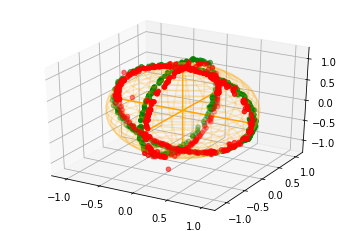

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(normalized[:, 0], normalized[:, 1],normalized[:, 2], marker='o', color='r')
ax.scatter(magnorm[:, 0], magnorm[:, 1],magnorm[:, 2], marker='o', color='g')
ellipsoid_plot([0, 0, 0], [1, 1, 1], np.identity(3), ax=ax, plot_axes=True, cage_color='orange')
plt.show()

In [5]:
accelCal.center


array([0.00783863, 0.00917389, 0.0058448 ])

In [6]:
accelCal.transformation

array([[ 1.00720583, -0.00726485, -0.00148803],
       [-0.00726485,  1.00419094,  0.00679391],
       [-0.00148803,  0.00679391,  0.98681196]])

In [11]:
magCal.center

array([ -8.45491974, -13.05672141,  16.54943882])

In [12]:
magCal.transformation

array([[ 0.03146083, -0.00043258, -0.00013931],
       [-0.00043258,  0.0307794 ,  0.0003345 ],
       [-0.00013931,  0.0003345 ,  0.03085292]])

In [11]:
mag[1,:]

array([23.9, -9.9, 11.1])

In [16]:
max(np.linalg.norm(magnorm,axis=1))

1.0872680317553545

In [17]:
min(np.linalg.norm(magnorm,axis=1))

0.9327834763893585

In [7]:
accelCal.center.tofile('data/accelCenter')
accelCal.transformation.tofile('data/accelTrans')
magCal.center.tofile('data/magCenter')
magCal.transformation.tofile('data/magTrans')

In [2]:
#save gyro Calibration
gyroCal.center.tofile('data/gyroCenter')
gyroCal.transformtion.tofile('data/gyroTrans')

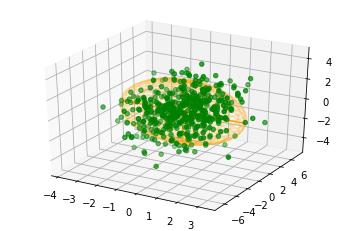

In [13]:
#check gyro data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
gyroCenter = gyroCal.correct(gyro)
#ax.scatter(gyro[:, 0], gyro[:, 1],gyro[:, 2], marker='o', color='r')
ax.scatter(gyroCenter[:, 0], gyroCenter[:, 1],gyroCenter[:, 2], marker='o', color='g')
ellipsoid_plot([0, 0, 0], [3, 3, 3], np.identity(3), ax=ax, plot_axes=True, cage_color='orange')
plt.show()

In [19]:
print(accelCal.center)
print(accelCal.transformation)
print(magCal.center)
print(magCal.transformation)

[0.03610293 0.05574535 0.06814677]
[[ 1.0781034  -0.21431702 -0.07403659]
 [-0.21431702  0.71177901 -0.24391956]
 [-0.07403659 -0.24391956  1.04424741]]
[ -8.70981008 -12.91955642  17.3433582 ]
[[ 0.03083491 -0.00050753 -0.00018444]
 [-0.00050753  0.03017014 -0.00017897]
 [-0.00018444 -0.00017897  0.03039004]]


In [10]:
accelCal = calibrator(np.fromfile('data/accelCenter'),np.fromfile('data/accelTrans').reshape(3,3),1)
magCal = calibrator(np.fromfile('data/magCenter'),np.fromfile('data/magTrans').reshape(3,3),1)

In [24]:
print(accelCal2.center)
print(accelCal2.transformation)
print(magCal2.center)
print(magCal2.transformation)

[0.03610293 0.05574535 0.06814677]
[[ 1.0781034  -0.21431702 -0.07403659]
 [-0.21431702  0.71177901 -0.24391956]
 [-0.07403659 -0.24391956  1.04424741]]
[ -8.70981008 -12.91955642  17.3433582 ]
[[ 0.03083491 -0.00050753 -0.00018444]
 [-0.00050753  0.03017014 -0.00017897]
 [-0.00018444 -0.00017897  0.03039004]]


In [14]:
#save Raw Data
accel.tofile('data/rawAccel')
gyro.tofile('data/rawGyro')
mag.tofile('data/rawMag')